## **Question 1** ##

Single layer perceptron

In [ ]:
import numpy as np
import pandas as pd

data=pd.read_csv('iris.csv')
data.columns=['Sepal_len_cm','Sepal_wid_cm','Petal_len_cm','Petal_wid_cm','Type']


# I am using Sigmoid function as the activation function

def activation_func(value):    #Tangent Hypotenuse
    #return (1/(1+np.exp(-value)))
    return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


def perceptron_train(in_data,labels,alpha):
    X=np.array(in_data)
    y=np.array(labels)
    weights=np.random.random(X.shape[1])
    original=weights
    bias=np.random.random_sample()
    for key in range(X.shape[0]):
        a=activation_func(np.matmul(np.transpose(weights),X[key]))
        yn=0
        if a>=0.7:
            yn=1
        elif a<=(-0.7):
            yn=-1
        weights=weights+alpha*(yn-y[key])*X[key]
        print('Iteration '+str(key)+': '+str(weights))
    print('Difference: '+str(weights-original))
    return weights

#  Testing and Score

def perceptron_test(in_data,label_shape,weights):
    X=np.array(in_data)
    y=np.zeros(label_shape)
    for key in range(X.shape[1]):
        a=activation_func((weights*X[key]).sum())
        y[key]=0
        if a>=0.7:
            y[key]=1
        elif a<=(-0.7):
            y[key]=-1
    return y


def score(result,labels):
    difference=result-np.array(labels)
    correct_ctr=0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            correct_ctr+=1
    score=correct_ctr*100/difference.size
    print('Score='+str(score))


# Main code

divider = np.random.rand(len(data)) < 0.70
d_train = data[divider]
d_test = data[~divider]

# Dividing d_train into data and labels/targets
d_train_y = d_train['Type']
d_train_X = d_train.drop(['Type'], axis=1)

    # Dividing d_train into data and labels/targets
d_test_y = d_test['Type']
d_test_X = d_test.drop(['Type'], axis=1)

    # Learning rate
alpha = 0.001

    # Train
weights = perceptron_train(d_train_X, d_train_y, alpha)

    # Test
result_test = perceptron_test(d_test_X, d_test_y.shape, weights)

    # Calculate score
score(result_test, d_test_y)

Iteration 0: [0.55388397 0.40483867 0.88147682 0.25881346]
Iteration 1: [0.55848397 0.40793867 0.88297682 0.25901346]
Iteration 2: [0.56348397 0.41153867 0.88437682 0.25921346]
Iteration 3: [0.56888397 0.41543867 0.88607682 0.25961346]
Iteration 4: [0.57328397 0.41833867 0.88747682 0.25981346]
Iteration 5: [0.57818397 0.42143867 0.88897682 0.25991346]
Iteration 6: [0.58358397 0.42513867 0.89047682 0.26011346]
Iteration 7: [0.58838397 0.42853867 0.89207682 0.26031346]
Iteration 8: [0.59318397 0.43153867 0.89347682 0.26041346]
Iteration 9: [0.59748397 0.43453867 0.89457682 0.26051346]
Iteration 10: [0.60328397 0.43853867 0.89577682 0.26071346]
Iteration 11: [0.60898397 0.44293867 0.89727682 0.26111346]
Iteration 12: [0.61468397 0.44673867 0.89897682 0.26141346]
Iteration 13: [0.61978397 0.45053867 0.90047682 0.26171346]
Iteration 14: [0.62518397 0.45393867 0.90217682 0.26191346]
Iteration 15: [0.63028397 0.45763867 0.90367682 0.26231346]
Iteration 16: [0.63488397 0.46123867 0.90467682 0.

Multi layer perceptron

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8631 - loss: 0.4786 - val_accuracy: 0.9573 - val_loss: 0.1433
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9619 - loss: 0.1251 - val_accuracy: 0.9672 - val_loss: 0.1098
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9752 - loss: 0.0804 - val_accuracy: 0.9686 - val_loss: 0.1029
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9812 - loss: 0.0606 - val_accuracy: 0.9712 - val_loss: 0.0934
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9855 - loss: 0.0445 - val_accuracy: 0.9684 - val_loss: 0.1151
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9675 - loss: 0.1078

Test accuracy: 0.9720


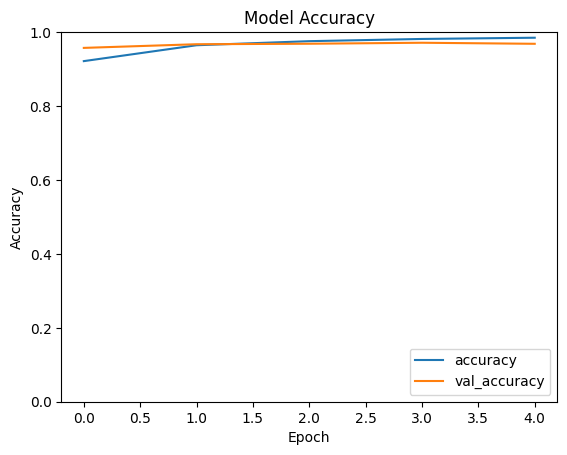

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 2: Load the MNIST Dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Preprocess Data
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

# Step 4: Build the MLP Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# Step 8: Plot Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

##**Question 2**##

SVM classifier

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Step 2: Load and Preprocess the MNIST Dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images and normalize the data
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255

# Combine train and test data for further analysis
X = np.vstack((x_train, x_test))
y = np.hstack((y_train, y_test))

# For EDA, reduce the data size (optional)
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.9, random_state=42)

<ipython-input-5-bcc3477c4c7b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to

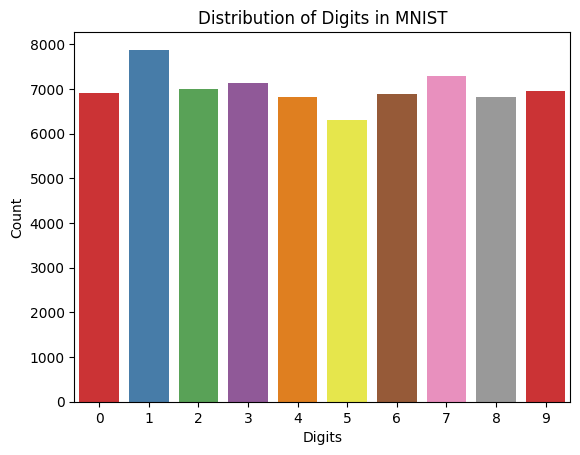

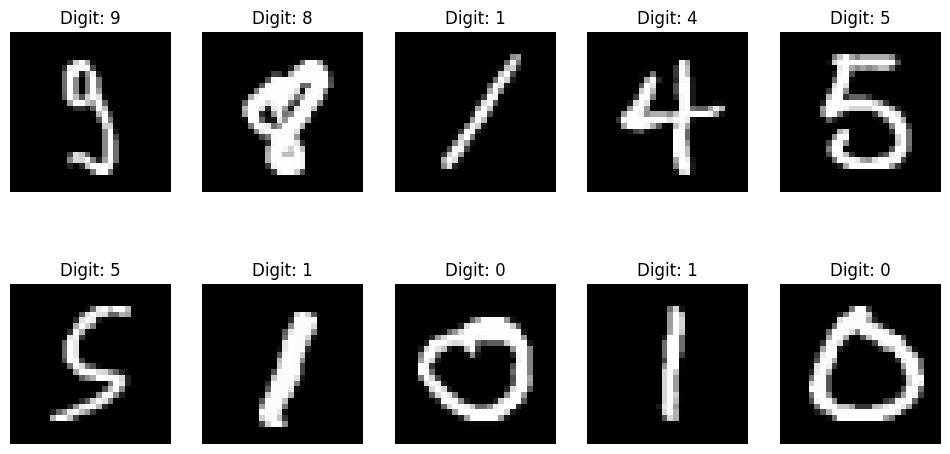

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Visualize the distribution of digits
sns.countplot(x=y, palette='Set1')
plt.title('Distribution of Digits in MNIST')
plt.xlabel('Digits')
plt.ylabel('Count')
plt.show()

# Visualize sample images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_sample[i].reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {y_sample[i]}')
    plt.axis('off')
plt.show()

In [ ]:
# Step 4: Prepare data for SVM
# Split the dataset
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [ ]:
def run_svm_and_evaluate(kernel, C):
    model = SVC(kernel=kernel, C=C, probability=True)
    model.fit(x_train_scaled, y_train)

    # Predict
    y_pred = model.predict(x_val_scaled)
    y_pred_proba = model.predict_proba(x_val_scaled)[:, 1]  # For ROC-AUC

    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_val, y_pred)
    class_report = classification_report(y_val, y_pred)

    # Calculate ROC AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    # Print outputs
    print(f'Kernel: {kernel}, C: {C}')
    print('Confusion Matrix:')
    print(cm)
    print('\nClassification Report:')
    print(class_report)
    print(f'ROC AUC: {roc_auc:.4f}')

    # ROC Curve
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Kernel: {kernel}, C: {C}')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
# Step 6: Run SVM with Default Hyperparameters
run_svm_and_evaluate(kernel='linear', C=1)

# SVM with Linear Kernel
for C in [1, 50, 500]:
    run_svm_and_evaluate(kernel='linear', C=C)

# SVM with Polynomial Kernel
for C in [1, 50, 500]:
    run_svm_and_evaluate(kernel='poly', C=C)

# SVM with RBF Kernel
for C in [1, 50, 500]:
    run_svm_and_evaluate(kernel='rbf', C=C)

# SVM with Sigmoid Kernel
for C in [1, 50, 500]:
    run_svm_and_evaluate(kernel='sigmoid', C=C)